In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import paths

# TODO: Deleteme after developing
%load_ext autoreload
%autoreload 2

## Params

In [2]:
ORG_NAME = 'Decentraland'
SPLITS_FREQ = 'W-THU'  # Split weekly
LAST_FOLDS = 10  # Use just last 10 splits
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR: str = '2023-07-13'

# Specific to this notebook
MODEL_NAMES = [
    'itemknn',
    'userknn',
    'plnsim',
]
NEEDED_COLS = [
    'time_train',
    'time_rec',
    'time_eval',
]

In [3]:
# Parameters
EXECUTION_ID = "2024-09-04T10:00"
ORG_NAME = "SharkDAO"
SPLITS_FREQ = "3d"
LAST_FOLDS = 10
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR = "2022-04-27"


## Read baselines

In [4]:
dfo = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfo

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2021-08-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072918
2021-08-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069774
2021-08-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068467
2021-08-18,1.000000,0.333333,0.200000,0.100000,0.066667,0.010000,1.000000,1.000000,1.000000,1.000000,...,1.000,1.000,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.124267
2021-08-21,0.611111,0.351852,0.211111,0.105556,0.070370,0.010556,0.611111,0.856473,0.856473,0.856473,...,1.000,1.000,1.000,0.954545,1.000000,1.000000,1.000000,1.000000,1.000000,0.122445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06,0.200000,0.200000,0.200000,0.120000,0.080000,0.012000,0.200000,0.231985,0.309426,0.336021,...,0.440,0.440,0.440,0.555556,0.389583,0.424074,0.424074,0.424074,0.424074,0.127107
2023-07-09,0.083333,0.111111,0.216667,0.108333,0.072222,0.010833,0.080000,0.157792,0.438739,0.434993,...,0.875,0.875,0.875,0.583333,0.583333,0.625000,0.625000,0.625000,0.625000,0.129676
2023-07-12,0.777778,0.333333,0.255556,0.127778,0.085185,0.012778,0.777778,0.782357,0.866194,0.866194,...,1.000,1.000,1.000,0.869048,0.916667,0.916667,0.916667,0.916667,0.916667,0.125586


In [5]:
dfp = paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfp

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2021-08-09,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.072799
2021-08-12,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.072793
2021-08-15,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.072304
2021-08-18,1.0,0.333333,0.200000,0.100000,0.066667,0.010000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.000000,1.000,1.000000,1.0,1.0,1.0,0.128978
2021-08-21,1.0,0.351852,0.211111,0.105556,0.070370,0.010556,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.972222,1.000,1.000000,1.0,1.0,1.0,0.129036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06,1.0,0.755556,0.506667,0.253333,0.168889,0.025333,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.524444,0.940,1.000000,1.0,1.0,1.0,0.129600
2023-07-09,1.0,0.413333,0.264000,0.136000,0.090667,0.013600,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.900000,0.980,0.993333,1.0,1.0,1.0,0.129972
2023-07-12,1.0,0.425926,0.255556,0.127778,0.085185,0.012778,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.898148,1.000,1.000000,1.0,1.0,1.0,0.128794


## Get other model results

In [6]:
x = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
x

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name
fold,,,,,,,,,,,,,,,,,,,,,
2021-08-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072918,openpop
2021-08-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069774,openpop
2021-08-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068467,openpop
2021-08-18,1.000000,0.333333,0.200000,0.100000,0.066667,0.010000,1.000000,1.000000,1.000000,1.000000,...,1.000,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.124267,openpop
2021-08-21,0.611111,0.351852,0.211111,0.105556,0.070370,0.010556,0.611111,0.856473,0.856473,0.856473,...,1.000,1.000,0.954545,1.000000,1.000000,1.000000,1.000000,1.000000,0.122445,openpop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06,0.200000,0.200000,0.200000,0.120000,0.080000,0.012000,0.200000,0.231985,0.309426,0.336021,...,0.440,0.440,0.555556,0.389583,0.424074,0.424074,0.424074,0.424074,0.127107,openpop
2023-07-09,0.083333,0.111111,0.216667,0.108333,0.072222,0.010833,0.080000,0.157792,0.438739,0.434993,...,0.875,0.875,0.583333,0.583333,0.625000,0.625000,0.625000,0.625000,0.129676,openpop
2023-07-12,0.777778,0.333333,0.255556,0.127778,0.085185,0.012778,0.777778,0.782357,0.866194,0.866194,...,1.000,1.000,0.869048,0.916667,0.916667,0.916667,0.916667,0.916667,0.125586,openpop


In [7]:
def load_all_results_from_suffix(suffix, perfect=False, openpop=True):
    df = pd.concat((
        paths.get_model_results(
            f'{mn}-best-{suffix}', 
            ORG_NAME, 
            SPLITS_FREQ, 
            SPLITS_NORMALIZE
        ).reset_index().set_index('fold').assign(model_name=mn,results_suffix=suffix) for mn in MODEL_NAMES))
    assert not df.empty
    if openpop:
        openpop = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
        openpop = openpop.loc[df.index.unique()]
        df = pd.concat((df, openpop))
    if perfect:
        df = pd.concat((df, paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='perfect')))
    return df #.dropna(axis='columns')

_ = load_all_results_from_suffix('test')
print(_.columns)
# _[_['map@15'].isna()]
_

Index(['k', 'window_size', 'fold_t', 'time_train', 'time_rec',
       'open_proposals', 'min_recs', 'avg_recs', 'precision@1', 'precision@3',
       'precision@5', 'precision@10', 'precision@15', 'precision@100',
       'ndcg@1', 'ndcg@3', 'ndcg@5', 'ndcg@10', 'ndcg@15', 'ndcg@100', 'map@1',
       'map@3', 'map@5', 'map@10', 'map@15', 'map@100', 'recall@1', 'recall@3',
       'recall@5', 'recall@10', 'recall@15', 'recall@100', 'r-precision@1',
       'r-precision@3', 'r-precision@5', 'r-precision@10', 'r-precision@15',
       'r-precision@100', 'time_eval', 'model_name', 'results_suffix',
       'rec_users'],
      dtype='object')


,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2022-04-03,15.0,10YE,2022-04-03,0.004111,0.042967,3.0,1.0,2.666667,0.166667,0.422222,...,0.600000,0.857143,0.857143,0.857143,0.857143,0.857143,0.126997,itemknn,test,NaN
2022-04-06,1.0,7d,2022-04-06,0.005690,0.006715,2.0,1.0,1.800000,0.400000,0.400000,...,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.124268,itemknn,test,NaN
2022-04-09,8.0,90d,2022-04-09,0.003532,0.016792,2.0,1.0,1.769231,0.769231,0.487179,...,0.700000,1.000000,1.000000,1.000000,1.000000,1.000000,0.124743,itemknn,test,NaN
2022-04-12,4.0,7d,2022-04-12,0.001269,0.011831,5.0,2.0,4.000000,0.500000,0.566667,...,0.433333,0.761905,0.761905,0.761905,0.761905,0.761905,0.124736,itemknn,test,NaN
2022-04-15,4.0,7d,2022-04-15,0.003554,0.011020,4.0,1.0,3.000000,0.333333,0.296296,...,0.611111,1.000000,1.000000,1.000000,1.000000,1.000000,0.123947,itemknn,test,NaN
2022-04-18,9.0,60d,2022-04-18,0.005803,0.011642,3.0,3.0,3.000000,0.375000,0.541667,...,0.500000,0.600000,0.600000,0.600000,0.600000,0.600000,0.123787,itemknn,test,NaN
2022-04-21,2.0,14d,2022-04-21,0.019543,0.014030,6.0,1.0,4.636364,0.727273,0.575758,...,0.487500,0.712500,0.937500,1.000000,1.000000,1.000000,0.127043,itemknn,test,NaN
2022-04-24,1.0,7d,2022-04-24,0.001228,0.016167,6.0,4.0,5.214286,0.428571,0.404762,...,0.666667,0.722222,0.722222,0.722222,0.722222,0.722222,0.125790,itemknn,test,NaN
2022-04-27,5.0,7d,2022-04-27,0.005777,0.008658,5.0,4.0,4.333333,0.500000,0.555556,...,0.500000,0.708333,0.833333,0.833333,0.833333,0.833333,0.124465,itemknn,test,NaN


In [8]:
# Using the hparams that optimize the average results
rdf_avg = load_all_results_from_suffix('avg')
# Using the hparams that optimize that fold
rdf_val = load_all_results_from_suffix('val')
# Using the hparams that optimized the previous fold on the next fold (CVTT)
rdf_test = load_all_results_from_suffix('test')
rdf_test

,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2022-04-03,15.0,10YE,2022-04-03,0.004111,0.042967,3.0,1.0,2.666667,0.166667,0.422222,...,0.600000,0.857143,0.857143,0.857143,0.857143,0.857143,0.126997,itemknn,test,NaN
2022-04-06,1.0,7d,2022-04-06,0.005690,0.006715,2.0,1.0,1.800000,0.400000,0.400000,...,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.124268,itemknn,test,NaN
2022-04-09,8.0,90d,2022-04-09,0.003532,0.016792,2.0,1.0,1.769231,0.769231,0.487179,...,0.700000,1.000000,1.000000,1.000000,1.000000,1.000000,0.124743,itemknn,test,NaN
2022-04-12,4.0,7d,2022-04-12,0.001269,0.011831,5.0,2.0,4.000000,0.500000,0.566667,...,0.433333,0.761905,0.761905,0.761905,0.761905,0.761905,0.124736,itemknn,test,NaN
2022-04-15,4.0,7d,2022-04-15,0.003554,0.011020,4.0,1.0,3.000000,0.333333,0.296296,...,0.611111,1.000000,1.000000,1.000000,1.000000,1.000000,0.123947,itemknn,test,NaN
2022-04-18,9.0,60d,2022-04-18,0.005803,0.011642,3.0,3.0,3.000000,0.375000,0.541667,...,0.500000,0.600000,0.600000,0.600000,0.600000,0.600000,0.123787,itemknn,test,NaN
2022-04-21,2.0,14d,2022-04-21,0.019543,0.014030,6.0,1.0,4.636364,0.727273,0.575758,...,0.487500,0.712500,0.937500,1.000000,1.000000,1.000000,0.127043,itemknn,test,NaN
2022-04-24,1.0,7d,2022-04-24,0.001228,0.016167,6.0,4.0,5.214286,0.428571,0.404762,...,0.666667,0.722222,0.722222,0.722222,0.722222,0.722222,0.125790,itemknn,test,NaN
2022-04-27,5.0,7d,2022-04-27,0.005777,0.008658,5.0,4.0,4.333333,0.500000,0.555556,...,0.500000,0.708333,0.833333,0.833333,0.833333,0.833333,0.124465,itemknn,test,NaN


In [9]:
assert rdf_avg.index.nunique() == rdf_val.index.nunique() == rdf_test.index.nunique()+1

<Axes: xlabel='fold', ylabel='map@10'>

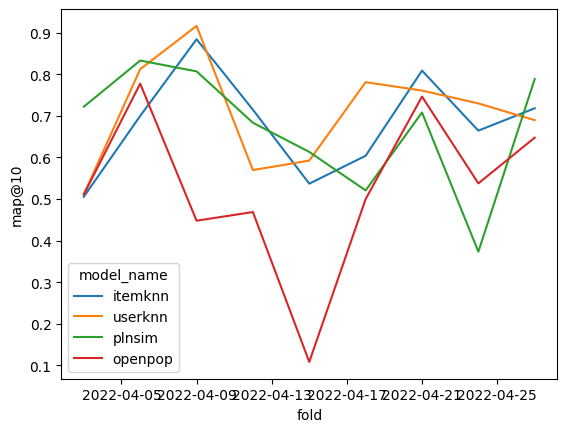

In [10]:
sns.lineplot(rdf_test.reset_index(), x='fold', y='map@10', hue='model_name')

In [11]:
model_suffixes = [
    'avg', # Using the hparams that optimize the average results
    'test', # Using the hparams that optimize that fold
    'valid', # Using the hparams that optimized the previous fold on the next fold (CVTT)
]

In [12]:
paths.get_model_results(MODEL_NAMES[0]+'-best-val', ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)

,,,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,precision@5,precision@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,k,window_size,,,,,,,,,,,,,,,,,,,,,
2022-03-31,15,10YE,2022-03-31,0.004194,0.022727,1,1.0,1.000000,1.000000,0.333333,0.200000,0.100000,...,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.120498
2022-04-03,1,7d,2022-04-03,0.004139,0.024563,3,1.0,2.375000,0.312500,0.375000,0.225000,0.112500,...,1.0,1.0,1.0,0.866667,1.000000,1.000000,1.000000,1.000000,1.000000,0.126682
2022-04-06,8,90d,2022-04-06,0.001265,0.012233,2,1.0,1.875000,0.625000,0.416667,0.250000,0.125000,...,1.0,1.0,1.0,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,0.123902
2022-04-09,4,7d,2022-04-09,0.001163,0.009758,2,1.0,1.625000,0.875000,0.458333,0.275000,0.137500,...,1.0,1.0,1.0,0.785714,1.000000,1.000000,1.000000,1.000000,1.000000,0.124429
2022-04-12,4,7d,2022-04-12,0.001269,0.011831,5,2.0,4.000000,0.500000,0.566667,0.400000,0.200000,...,1.0,1.0,1.0,0.433333,0.761905,0.761905,0.761905,0.761905,0.761905,0.124736
2022-04-15,9,60d,2022-04-15,0.001267,0.015026,4,1.0,3.250000,0.416667,0.305556,0.266667,0.133333,...,1.0,1.0,1.0,0.666667,0.900000,0.900000,0.900000,0.900000,0.900000,0.122857
2022-04-18,2,14d,2022-04-18,0.001819,0.010274,3,3.0,3.000000,0.750000,0.541667,0.325000,0.162500,...,1.0,1.0,1.0,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.123665
2022-04-21,1,7d,2022-04-21,0.001090,0.011261,6,1.0,4.333333,0.777778,0.481481,0.466667,0.244444,...,1.0,1.0,1.0,0.652381,0.814286,0.976190,1.000000,1.000000,1.000000,0.125411
2022-04-24,5,7d,2022-04-24,0.001123,0.016163,6,4.0,5.214286,0.571429,0.428571,0.342857,0.185714,...,1.0,1.0,1.0,0.604167,0.700000,0.700000,0.700000,0.700000,0.700000,0.125716
